# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)

# Needed for plotting
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt
from collections import Counter
from sklearn.model_selection import train_test_split

# Evaluation of the model 
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.inspection import permutation_importance



# THe model used 
from sklearn.neural_network import MLPClassifier    # NeuralNetwork
from sklearn.ensemble import RandomForestClassifier # RandomForest
from sklearn.linear_model import LogisticRegression #LinearClassification

# Introduction
In this project we want to answer a few machine learning related questions. The questions are the following : 
* How do ML-algorithms perform when applied to datasets with different levels of dimensionality, and what are the best dimensionality reduction techniques for improving performance in the presence of data challenges?
* How does the choice of regularization techniques (such as L1 or L2 regularization, dropout, or early stopping) impact the extent of overfitting in various types of machine learning models?
* How does the choice of model complexity, such as the number of features, hidden layers, and neurons in a neural network, influence the risk of underfitting in machine learning models, and how can model complexity be optimized to balance the trade-off between underfitting and overfitting?

To do so, we will try to fit data on 3 widely different models (for both classification and regression problems) in term of complexity, and the way each algorithm works. It is important to note that we choose to go with real-life existing datasets and also synthetic datasets.

# The algorithms
In order to answer these questions, we chose to go with 3 different yet interesting algorithms for either classification or regression problems. 
## For classification : 
* Logistic Regression 
* Neural Network 
* RandomForrest 

## For regression : 
* Linear regression
* Neural network
* RandomForrest


### Logistic Regression 
Logistic regression is a statistical model used for binary classification tasks, where the goal is to predict the probability of an instance belonging to a certain class. It is a simple yet powerful algorithm that is widely used in various fields, including machine learning and statistics.

The logistic regression model assumes a linear relationship between the input variables (also known as features or independent variables) and the log-odds of the output variable (also known as the dependent variable or the target class). It is called "logistic" because it uses the logistic function, also known as the sigmoid function, to map the linear combination of inputs to a probability value between 0 and 1. 
Mathematically , it represented as : 

\begin{align}
P(y = \frac{1}{x}) = \frac{1}{1 + e^{-z}}
\end{align}

where p(y = 1 | x) represents the probability of the output variable y being 1 given the input variable x, and z represents the linear combination of the input variables with their respective weights:

\begin{align}
z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
\end{align}

In this equation, w0, w1, w2, ..., wn are the weights associated with each input variable, and x1, x2, ..., xn are the values of the corresponding input variables. 
 The goal of logistic regression is to estimate the optimal values for these weights, which are learned from the training data.

### Neural network (Multi Layered Perceptron)
A multi-layer perceptron (MLP) is a type of artificial neural network that consists of multiple layers of interconnected artificial neurons, also known as nodes. It is a feedforward neural network, meaning that information flows through the network from the input layer to the output layer without any loops or feedback connections.

The purpose of an MLP is to learn the optimal weights that minimize a specified loss or error function. This is typically done using backpropagation, which is an algorithm that propagates the error backward through the network, adjusting the weights in each layer based on the error gradient. The weights are updated iteratively using optimization techniques like gradient descent or its variants.

Briefly , here are the main important processes that this architecture is based on:
* Weight Initialization: The weights in an MLP are typically initialized randomly. Let's denote the weight connecting node i in layer l to node j in layer (l+1) as $w_{ij}^{l}$.
* Forward Propagation: Given an input vector x, the outputs of each layer can be computed as follows:


\begin{align}
a_i^l = f(\sum_{(j = 1)}^{N^{l-1}} w_{ij}^{l-1} a_{j}^{(l-1)} + b_{i}^{(l-1)})
\end{align}

* Activation Function: The activation function introduces nonlinearity into the network and is typically denoted as g(). The two most common are sigmoid functions, one being the hyperbolic tangeant $g(v_i) = tanh(v_i)$ and the other being the logistic function $g(v_i) = \frac{1}{1 + e^{-v_i}}$

* Backpropagration : it is used to update the weights in the network based on the calculated error. The error at the output layer can be denoted as $\delta_{i}^{(L)}$ 



## RandomForrest 
Random Forest is a popular machine learning algorithm used for both classification and regression tasks. It belongs to the ensemble learning family, which combines multiple individual models to make predictions. Random Forest is built upon decision trees and introduces randomness to enhance the model's performance and reduce overfitting.

For both classification and regression models, the RandomForrest algorithm works in 3 main steps: 
* Building trees : creates an ensemble of decision trees. Each decision tree is trained using a random subset of the training data, typically selected through bootstrap sampling.

* Feature Subset Selection: At each node of the decision tree, a random subset of features, denoted as F, is considered for splitting. This subset is typically selected at each tree construction and remains fixed during the entire tree-building process.

* Voting/Averaging ( Classification/Regression) : The final output is either voted independently by each decision tree in classification or averaged in regression. Let's denote the predicted class label of tree t as Ct(x), where x represents the input for classification, whereas for regression it is noted Rt(x).




### The linear regression algorithm 

Linear Regression is a supervised learning algorithm used for predicting a continuous output variable based on one or more input features. It assumes a linear relationship between the input features and the output variable.


\begin{align}
\hat{y}= w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
\end{align}

Here, $\hat{y}$ is the predicted output value, $w_0$ is the y-intercept (bias term). The weights w are a vector noted $\vect{w}$

#   Question 01 :  How do ML-algorithms react to different levels of dimensionality ? 

In order to answer this question and since its concerns different levels of dimensionality, we need to build synthetic datasets with different number of features, and fit the chosen models on them.But first, what is synthetic data, and how is it used ? 


## Data challenges : How to overpass them ?
### The Curse of Dimensionality 
It is the idea that machine learning problems can sometimes be "cursed" by a too large of a dimension size, loosing performance overall. The number of features becomes an important parameter when training complex models, since it has an exponential relation with the number of data points needed to reach good performances. On the other hand, an excessive increase of dimensionality also leads to poor performances.


In [ ]:
# Different dimensionality synthetic datasets : 
    #random_state = 100 to reproduce results
    # flip_y = 0.05 to add some noise --> challenging 
x_1,y_1 = dt.make_classification(n_samples=2000,
                                 n_features=5,
                                 n_informative = 3,
                                 weights = [0.45 , 0.55],
                                 n_redundant=0, 
                                 n_classes = 2, class_sep = 1.2 , random_state = 100 , flip_y = 0.06)

x_2,y_2 = dt.make_classification(n_samples=2000,
                                 n_features=10,
                                 n_informative = 5,
                                 weights = [0.45, 0.55],
                                 n_redundant=0, 
                                 n_classes = 2, 
                                class_sep = 1.2, random_state = 100 , flip_y = 0.06 )

x_3,y_3 = dt.make_classification(n_samples=2000,
                                 n_features= 30,
                                 n_informative = 15,
                                 weights = [0.45 , 0.55],
                                 n_redundant=0, 
                                 n_classes = 2, class_sep = 1.2,random_state = 100, flip_y = 0.06 )

In [ ]:
# The 3-ML Models 
nnModel_1 = MLPClassifier(solver= "adam" , random_state = 0)
nnModel_2 = MLPClassifier(solver= "adam" , random_state = 0)
nnModel_3 = MLPClassifier(solver= "adam" , random_state = 0)

rfModel_1 = RandomForestClassifier(random_state = 0)
rfModel_2 = RandomForestClassifier(random_state = 0)
rfModel_3 = RandomForestClassifier(random_state = 0)

lrModel_1 = LogisticRegression(solver ="lbfgs" , random_state =0)
lrModel_2 = LogisticRegression(solver ="lbfgs",random_state = 0)
lrModel_3 = LogisticRegression(solver ="lbfgs",random_state = 0)

In [ ]:
# Splitting the data 
x_train_1 , x_test_1 , y_train_1 , y_test_1 = train_test_split(x_1 , y_1 , test_size = 0.2 , random_state = 100 )
x_train_2 , x_test_2 , y_train_2 , y_test_2 = train_test_split(x_2 , y_2 , test_size = 0.2, random_state = 100)
x_train_3 , x_test_3 , y_train_3 , y_test_3 = train_test_split(x_3 , y_3 , test_size = 0.2, random_state = 100)

# Fitting the data to the models
for model_data in [(nnModel_1, x_train_1 , y_train_1) ,
                  (nnModel_2, x_train_2 , y_train_2),
                  (nnModel_3, x_train_3 , y_train_3),
                  
                   (lrModel_1, x_train_1 , y_train_1),
                  (lrModel_2, x_train_2 , y_train_2),
                  (lrModel_3, x_train_3 , y_train_3),
                  
                  (rfModel_1, x_train_1 , y_train_1),
                  (rfModel_2, x_train_2 , y_train_2),
                  (rfModel_3, x_train_3 , y_train_3)]: 
    model_data[0].fit(model_data[1] , model_data[2])


/home/zak/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/zak/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/zak/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Predict the test sets
y_pred_nn_1 = nnModel_1.predict(x_test_1)
y_pred_nn_2 = nnModel_2.predict(x_test_2)
y_pred_nn_3 = nnModel_3.predict(x_test_3)

y_pred_lr_1 = lrModel_1.predict(x_test_1)
y_pred_lr_2 = lrModel_2.predict(x_test_2)
y_pred_lr_3 = lrModel_3.predict(x_test_3)

y_pred_rf_1 = rfModel_1.predict(x_test_1)
y_pred_rf_2 = rfModel_2.predict(x_test_2)
y_pred_rf_3 = rfModel_3.predict(x_test_3)

## Evaluation : How do we evaluate the model's performance ? 
### First impression : accuracy score 
We can star by checking the accuracy score after predicting the test data, to get a first idea of how well the model fitted. Note that this evaluation method is far from enough in these types of problems, this is why we introduce confusion matrixes. 
### Classification reports
They are visual representation in a brief summary of the results of a classification problem prediction. It gives interesting details such as the F1-score and the recall, to better evaluate a model. 

In [ ]:
for elem in [(y_test_1 , y_pred_lr_1) , (y_test_1 , y_pred_nn_1),(y_test_1 , y_pred_rf_1),
            (y_test_2 , y_pred_lr_2),(y_test_2 , y_pred_nn_2),(y_test_2 , y_pred_rf_2),
            (y_test_3 , y_pred_lr_3),(y_test_3 , y_pred_nn_3),(y_test_3 , y_pred_rf_3)] : 
    print(classification_report(elem[0] , elem[1]))
    print("------------------------------------------------")



              precision    recall  f1-score   support

           0       0.98      0.95      0.96       182
           1       0.96      0.98      0.97       218

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       182
           1       0.96      0.99      0.97       218

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       182
           1       0.96      0.98      0.97       218

    accuracy                           0.96       400
   macro avg       0.97      0

### ROC Curves 

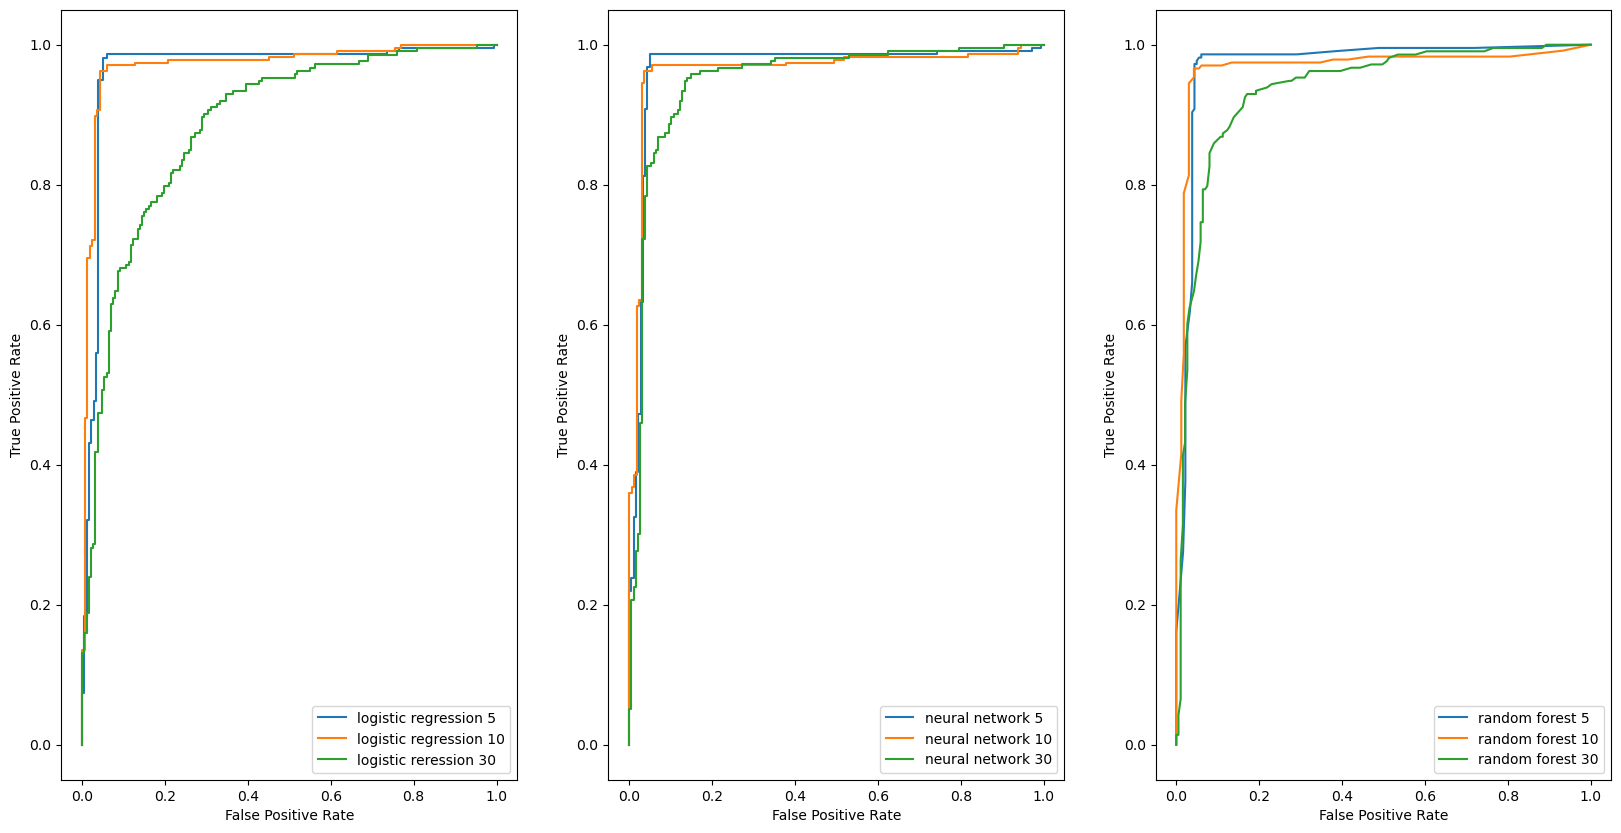

In [ ]:

# predict probabilities 

#Logistic regression 
y_pred_proba_1_lr = lrModel_1.predict_proba(x_test_1)[::,1]
y_pred_proba_2_lr = lrModel_2.predict_proba(x_test_2)[::,1]
y_pred_proba_3_lr = lrModel_3.predict_proba(x_test_3)[::,1]

#neural networks  
y_pred_proba_1_nn = nnModel_1.predict_proba(x_test_1)[::,1]
y_pred_proba_2_nn = nnModel_2.predict_proba(x_test_2)[::,1]
y_pred_proba_3_nn = nnModel_3.predict_proba(x_test_3)[::,1]

#RandomForest  
y_pred_proba_1_rf = rfModel_1.predict_proba(x_test_1)[::,1]
y_pred_proba_2_rf = rfModel_2.predict_proba(x_test_2)[::,1]
y_pred_proba_3_rf = rfModel_3.predict_proba(x_test_3)[::,1]

#define metrics LR
fpr_1_lr, tpr_1_lr, _ = metrics.roc_curve(y_test_1,  y_pred_proba_1_lr)
fpr_2_lr, tpr_2_lr, _ = metrics.roc_curve(y_test_2,  y_pred_proba_2_lr)
fpr_3_lr, tpr_3_lr, _ = metrics.roc_curve(y_test_3,  y_pred_proba_3_lr)

#define metrics NN
fpr_1_nn, tpr_1_nn, _ = metrics.roc_curve(y_test_1,  y_pred_proba_1_nn)
fpr_2_nn, tpr_2_nn, _ = metrics.roc_curve(y_test_2,  y_pred_proba_2_nn)
fpr_3_nn, tpr_3_nn, _ = metrics.roc_curve(y_test_3,  y_pred_proba_3_nn)

#define metrics
fpr_1_rf, tpr_1_rf, _ = metrics.roc_curve(y_test_1,  y_pred_proba_1_rf)
fpr_2_rf, tpr_2_rf, _ = metrics.roc_curve(y_test_2,  y_pred_proba_2_rf)
fpr_3_rf, tpr_3_rf, _ = metrics.roc_curve(y_test_3,  y_pred_proba_3_rf)

#create ROC curve

fig, axs = plt.subplots(1, 3, figsize=(20, 10))  # one row of Axes, two columns = 3 plots
axs[0].plot(fpr_1_lr,tpr_1_lr , label = "logistic regression 5")
axs[0].plot(fpr_2_lr,tpr_2_lr , label = "logistic regression 10")
axs[0].plot(fpr_3_lr,tpr_3_lr , label = "logistic reression 30")
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].legend()

axs[1].plot(fpr_1_nn,tpr_1_nn , label = "neural network 5")
axs[1].plot(fpr_2_nn,tpr_2_nn, label = "neural network 10")
axs[1].plot(fpr_3_nn,tpr_3_nn, label = "neural network 30")
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].legend()



axs[2].plot(fpr_1_rf,tpr_1_rf,label = "random forest 5")
axs[2].plot(fpr_2_rf,tpr_2_rf,label = "random forest 10")
axs[2].plot(fpr_3_rf,tpr_3_rf,label = "random forest 30")
axs[2].set_xlabel("False Positive Rate")
axs[2].set_ylabel("True Positive Rate")
axs[2].legend()


## Results and analysis  
We can see that amongst the three models proposed, the neural network classifier performs the better. Indeed, independently of the dimensionality, the model learns the quicker and gets overall the better results. 

Another important point is that the models trained on 30 features perform worse than the other ones, even if the dataset has more informative features ( 15 informative features out of 30 ). While the models trained on 5 and 10 features reach a true positive rate of 1 relatively quickly, the ones trained on 30 features take more false positives to ge there. They still perform well, according to the classification report with higher than 85% accuracy, but the performance loss is clear.

Actually, we can say that ML models are strongly affected by the **non-important** features, in a bad way. We thus want to always reduce the number of non informant features, to avoid feeding "*dimensional noise*" to the model.

When it comes to the question "how does each model react to different dimensionality levels ?", **neural networks** seem to be less affected by this problem, at least in our case since the neural network has the closest curves amongst the tree algorithms. Another interesting point to consider is how do the change of hidden layers number react to different levels of dimensionality ? Can they adapt to it and find a way to work with all the features by adding layers ? 

On the other hand, **LogisticRegression** seems to have trouble with a high number of redundant features, which makes it the most sensitive model of the three. 

## Dimensionality reduction techniques

We can now dig deeper into dimensionality reduction techniques, and askk oursleves : How can we make the 30-features model better? These techniques consist in removing features from the dataset before training the data, and thus taking th model from  high dimensional space to a lower on, and keeping the essence of the data.
They are broadly separated in two categories : 

### Feature Selection 
The feature selection method aims to find a subset of the most relevant features that have a direct impact on the target function. We will not look too deep into this category, since it is not the most important one. An easy way to select features is to check for the most important ones, an example below : 


#### Feature Importance with RandomForest
In classification problems, it is always interesting to check for the feature importances, specially in our case since we want to study the dimensionality's role in a machine learning problem. Unfortunately, not all models have a feature_importances_ attribute, but we can at least check these for the RandomForest model. 

In [ ]:
feature_names_1 = [f"feature {i}" for i in range(x_train_1.shape[1])]
feature_names_2 = [f"feature {i}" for i in range(x_train_2.shape[1])]
feature_names_3 = [f"feature {i}" for i in range(x_train_3.shape[1])]

result_1 = permutation_importance(
    rfModel_1, x_test_1, y_test_1,random_state=0)
result_2 = permutation_importance(
    rfModel_2, x_test_2, y_test_2,random_state=0)
result_3 = permutation_importance(
    rfModel_3, x_test_3, y_test_3,random_state=0)

forest_importances_1 = pd.Series(result_1.importances_mean, index=feature_names_1)
forest_importances_2 = pd.Series(result_2.importances_mean, index=feature_names_2)
forest_importances_3 = pd.Series(result_3.importances_mean, index=feature_names_3)


Text(0, 0.5, 'Mean accuracy decrease')

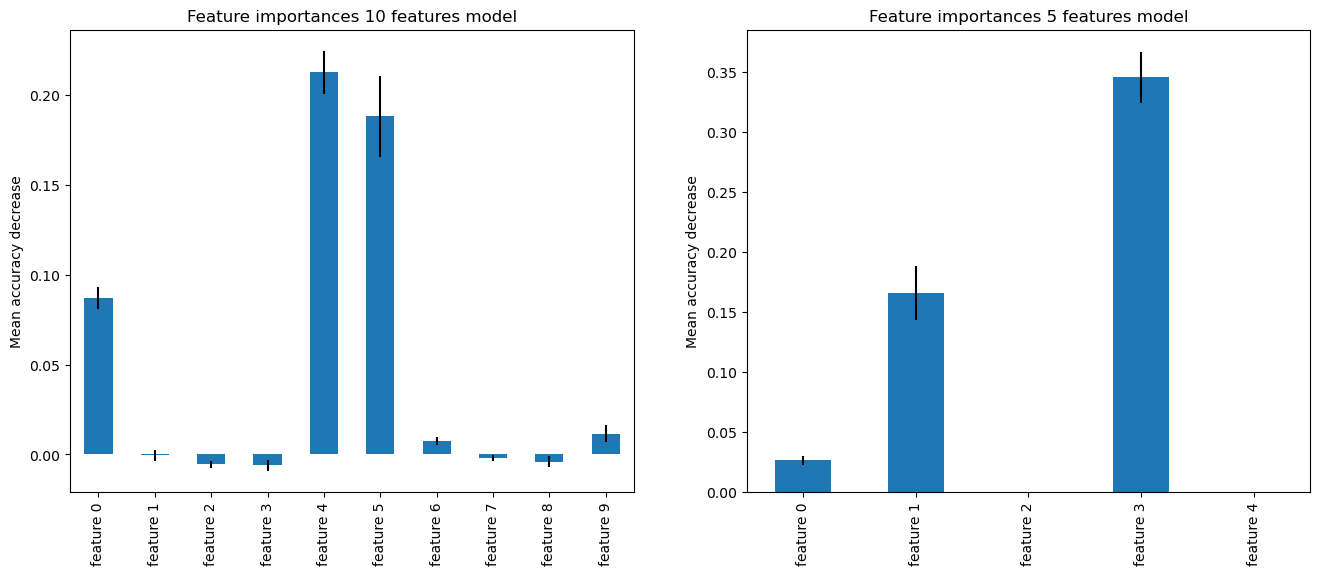

In [ ]:
fig, axs = plt.subplots(1,2 , figsize=(16,6))

axs[0] = forest_importances_2.plot.bar(yerr=result_2.importances_std, ax=axs[0])
axs[0].set_title("Feature importances 10 features model")
axs[0].set_ylabel("Mean accuracy decrease")

axs[1] = forest_importances_1.plot.bar(yerr=result_1.importances_std, ax=axs[1])
axs[1].set_title("Feature importances 5 features model")
axs[1].set_ylabel("Mean accuracy decrease")


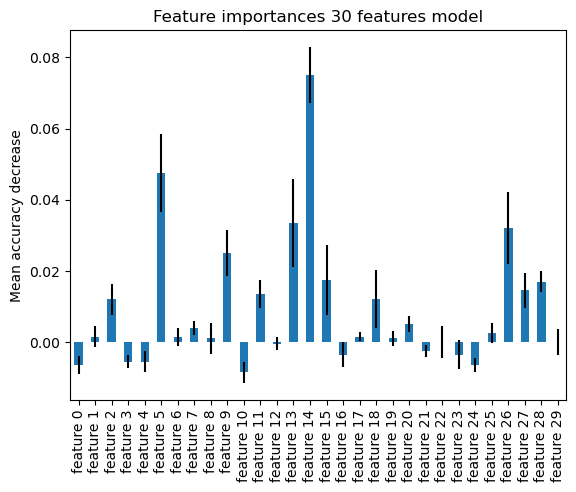

In [ ]:
forest_importances_3.plot.bar(yerr= result_3.importances_std)
plt.title("Feature importances 30 features model")
plt.ylabel("Mean accuracy decrease")
plt.show()

**Analysis**: By analysing the features importances, we can clearly see that our ML models rely much more on certain features than others. Some attributes are not even represented and have 0 importance according to the Mean Accuracy Decrease metric. These features can be ignored, which would lead to a simpler dataset and will help the model predict better.

We can check the distribution of the datapoints based on the 2 most important features for each model 

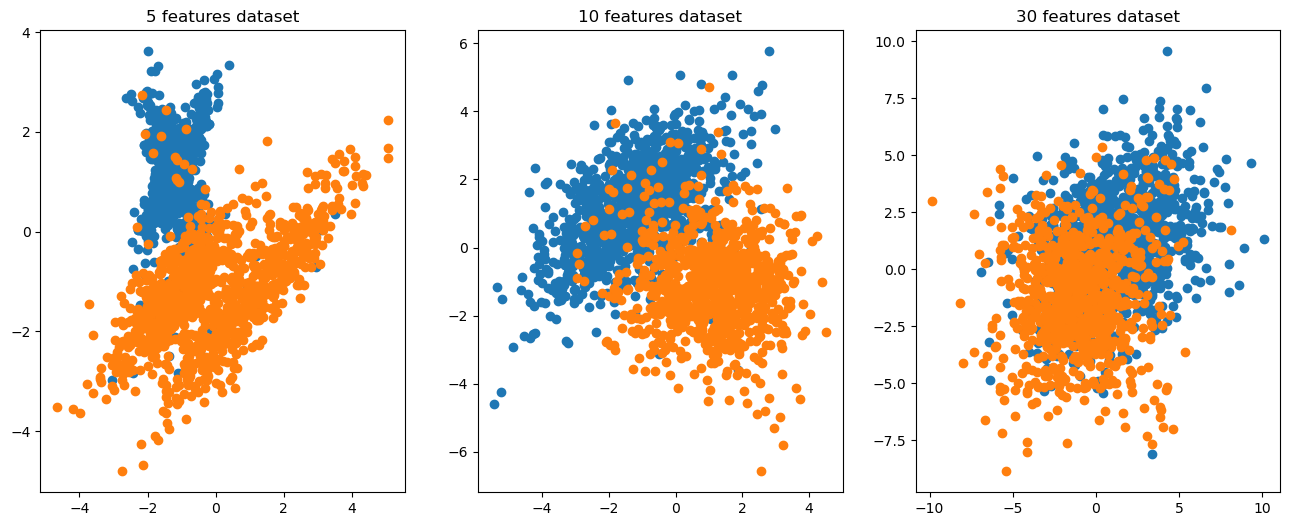

In [ ]:
fig , axs = plt.subplots(1,3 , figsize=(16,6))
for label , _ in Counter(y_1).items():
    row = np.where(y_1 == label)[0]
    axs[0].scatter(x_1[row,1] , x_1[row,3], label = str(label))
    axs[0].set_title("5 features dataset")

for label , _ in Counter(y_2).items():
    row = np.where(y_2 == label)[0]
    axs[1].scatter(x_2[row,5] , x_2[row,4], label = str(label))
    axs[1].set_title("10 features dataset")

for label , _ in Counter(y_3).items():
    row = np.where(y_3 == label)[0]
    axs[2].scatter(x_3[row,5] , x_3[row,14], label = str(label))
    axs[2].set_title("30 features dataset")


Or, we can also do it with the 3 most important features, to get a 3d projection of the distribution.

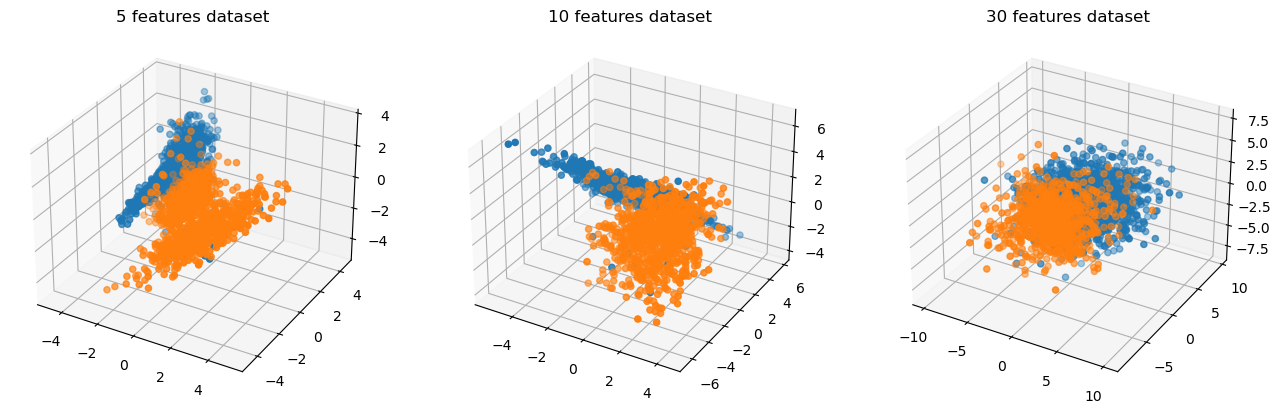

In [ ]:
fig , axs = plt.subplots(1,3 , figsize=(16,6) , subplot_kw={'projection': '3d'})
for label , _ in Counter(y_1).items():
    row = np.where(y_1 == label)[0]
    axs[0].scatter(x_1[row,1] , x_1[row,0] , x_1[row,3], label = str(label))
    axs[0].set_title("5 features dataset")

for label , _ in Counter(y_2).items():
    row = np.where(y_2 == label)[0]
    axs[1].scatter(x_2[row,5] , x_2[row,4],x_2[row,0] ,label = str(label))
    axs[1].set_title("10 features dataset")

for label , _ in Counter(y_3).items():
    row = np.where(y_3 == label)[0]
    axs[2].scatter(x_3[row,5] , x_3[row,14], x_3[row,26],label = str(label))
    axs[2].set_title("30 features dataset")


**Analysis** : According to these distribution plots, we can get a clear idea about how to split between the data points, which shows that the models can predict very accurately with much less features. This is what makes the feature selection technique a very important one to deal with dimensionality.

### Feature Extraction
After talking about the feature selection method, we are now gonna dig into the feature extraction or feature projection technique. It consists in converting the data from a high dimensional space to a lower one, by combining previous features from the original dataset into new ones. Note that this transformation can be linear, but it can also have a more complex form.

Many different sub-techniques exist, but we can explain the two most popular in ML projects nowadays : 

**PCA or Principal Component Analysis** 
It is one of the leading methods of feature extraction, and of dimensionality reduction in general. It consists in a direct mapping of the data to a lower dimensional space such that the variance of the data is maximized in the new dimensionality.

Eventhough it is one of the most common techniques, it has its disadvantages : 
* PCA conversion is sensitive to the original data scales.
* Using PCA on the data loose its interpretability.

**LDA or Linear Discriminant Analysis** : LDA represents data in a way that maximizes class separability. While objects belonging to the same class are juxtaposed via projection, objects from different classes are arranged far apart. It is a generalization of Fisher's discriminant method that is common is statistics.

Overall, when it comes to dimensionality reduction, no technique is the absolute best. Each has its quirks and advantages. Thus, the best way to implement dimensionality reduction techniques is to use systematic and controlled experiments to figure out which technique(s) works with your model and which delivers the best performance on a given dataset.



## Conclusions
Very briefly , these are the points that we concluded from thi study: 
* We introduced the notion of synthetic data 

* The Curse of Dimensionality is real and needs to be dealt with. 

* Neural networks adapt easier to high dimensions and redundant features.

* LogisticRegression looses an important amount of performance when dealing with redundant features.

* We saw different way to evaluate a model fitted for a classification problem. 

* We saw different dimensionality reduction techniques, and the way they deal with data.

# Question 02

# Question 03: How does the choice of model complexity in **Random Forest** and **Neural Network** models influence the risk of **underfitting** ?


## Definitions

**What is underfitting ?**
Underfitting refers to a situation in machine learning where a model fails to capture the underlying patterns and relationships in the training data. 


It occurs when the model is too simple or lacks the necessary complexity to adequately represent the data. As a result, an underfit model tends to have 
poor predictive performance not only on the training data but also on unseen or test data.

In terms of the equation theory, underfitting can be understood by considering the bias-variance tradeoff. The bias of a model represents the simplifying assumptions it makes to approximate the true underlying function of the data. Underfitting typically occurs when the model's bias is too high, leading to an oversimplified representation of the relationship between the input features and the target variable.


\begin{align}
Bias=E[\hat{θ}]−θ
\end{align}

\begin{align}
Var(\hat{θ})=E[{\hat{θ}}^2]−(E[\hat{θ}])^2
\end{align}


**What are the indicators of underfitting?**
- **Elevated training and test errors** : The model demonstrates significant errors or low accuracy levels on both the training and test datasets.

- **Insufficient learning capacity**: The model encounters difficulties in capturing intricate relationships, thereby possessing limited generalization capabilities towards unseen data.

- **Overly simplistic representations**: The model tends to oversimplify the data, resulting in biased or inaccurate predictions.

Underfitting can occur in various types of machine learning algorithms, including neural networks. 

It often happens when the model is too constrained or when there is insufficient training data to capture the true underlying patterns.


## Dataset Selection & preprocessing

To address this inquiry and delve into it further, we will utilize a real dataset comprising a record of 7 common different fish species in fish market sales. 

With this dataset, a predictive model can be performed using machine learning and the weight of a fish can be predicted.

### Data preprocessing

In [89]:
from sklearn.model_selection import train_test_split

fish = pd.read_csv('Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [90]:
fish.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
fish.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


**Invesigating  missing values :**

In [91]:
print(str('Is there any NaN value in the dataset: '), df.isnull().values.any())

Is there any NaN value in the dataset:  False


**Different Species and Their Counts:**

In [92]:
sp = fish['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


**We will convert qualitatve data into quantitative ones:**

In [93]:
# Converting Qualitative data into Quantitative Data
fish.loc[fish["Species"] == "Perch",["Species"]] = 0
fish.loc[fish["Species"] == "Bream",["Species"]] = 1
fish.loc[fish["Species"] == "Roach",["Species"]] = 2
fish.loc[fish["Species"] == "Pike",["Species"]] = 3
fish.loc[fish["Species"] == "Smelt",["Species"]] = 4
fish.loc[fish["Species"] == "Parkki",["Species"]] = 5
fish.loc[fish["Species"] == "Whitefish",["Species"]] = 6

**Splitting the dataset into training and test:**

In [129]:
# data set
X = fish.iloc[:,[0,2,3,4,5,6]]
y = fish['Weight']

# split data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## How will we proceed?

In this section, we will investigate how the choice of model complexity influences the risk of underfitting.

To address this, we will conduct a series of experiments to understand the relationship between model complexity and the risk of underfitting as 
our goal is to optimize it's complexity and identify the optimal configuration that strikes a balance without proning to overfitting.

We will conduct this experiment using two algorithns :
- Random Forest
- Neural Network


# Random Forest

In a random forest model, there are several parameters that can be manipulated to create different model configurations and impact the performance and behavior of the model. These parameters include:

- **Number of Trees**: The number of trees in the random forest ensemble. Increasing the number of trees can improve the model's performance and robustness, but it also increases the computational cost.

- **Maximum Depth**: The maximum depth of each decision tree in the random forest. Controlling the maximum depth can limit the complexity of individual trees and prevent overfitting. A smaller max_depth value creates simpler trees, while a larger value allows more complex trees.

- **Random State** 

### Configuration 01 :
- **n_estimators**: The number of estimators is set to a very low value of 10. With such a small number of trees, the model may not have enough capacity to capture the underlying patterns in the data effectively.

- **max_depth**: The maximum depth of each tree is set to 1. This means that the decision trees in the random forest will be very shallow, leading to oversimplified models that may underfit the data.

Bias:  18.445072904379437
Variance:  70848.70827471119
Score: 0.7324055774260455


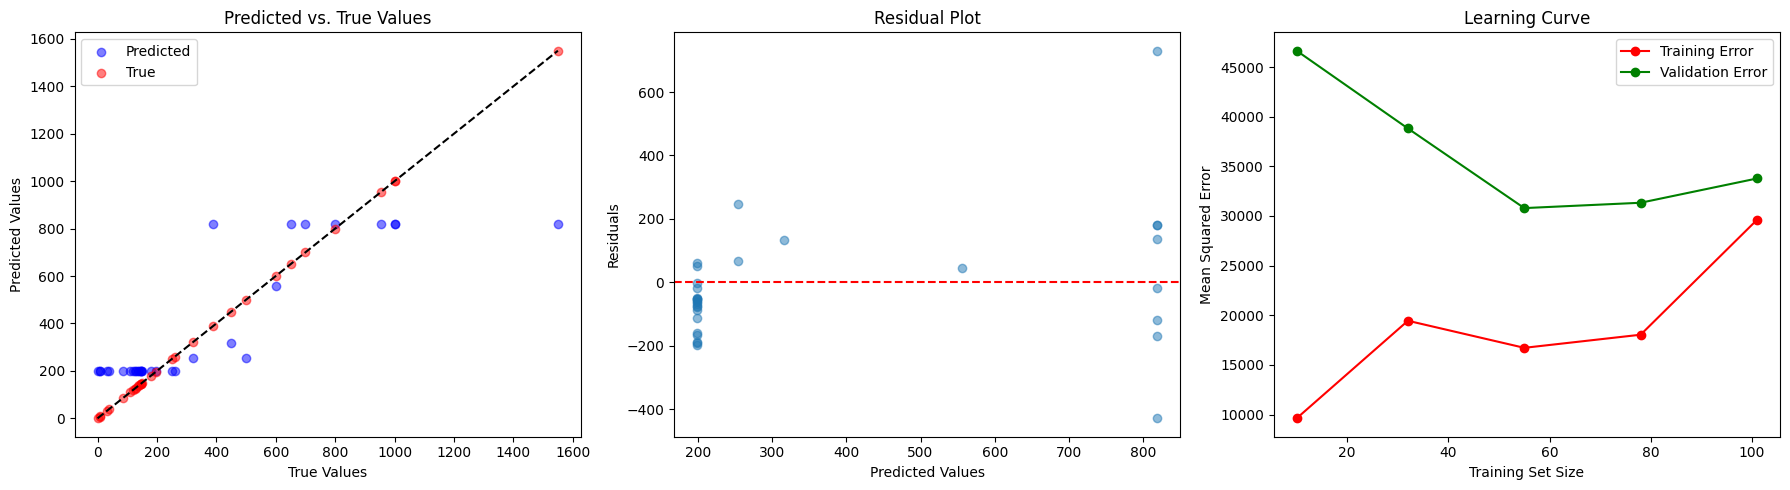

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

# Instantiate and fit the model
rf1 = RandomForestRegressor(n_estimators=10, max_depth=1, random_state=5)
rf1.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf1.predict(X_test)

# Calculate the bias
bias = np.mean(y_pred - y_test)

# Calculate the variance
variance = np.var(y_pred)

print("Bias: ", bias)
print("Variance: ", variance)
print('Score:', rf1.score(X_test, y_test))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual vs. Predicted
axes[0].scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')
axes[0].scatter(y_test, y_test, alpha=0.5, color='red', label='True')
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Predicted vs. True Values')
axes[0].legend()

# Plot 2: Residual Plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].axhline(y=0, color='r', linestyle='--')

# Plot 3: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
axes[2].plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Error')
axes[2].plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Error')
axes[2].set_xlabel('Training Set Size')
axes[2].set_ylabel('Mean Squared Error')
axes[2].set_title('Learning Curve')
axes[2].legend()

plt.tight_layout()
plt.show()


**Interpretations of values** 

Based on the configuration and the obtained results, we can analyze the performance of the model as follows:

- **Bias**: Since the bias represents the average difference between the predicted values and the true values. In this case, 18.45, indicating that, on average, the model's predictions deviate by approximately 18.45 units from the true values. This is a high bias value suggesting that the model is underfitting the data and failing to capture the underlying patterns.

- **Variance**:  A high variance value of 70,848.71 suggests that the model's predictions are highly sensitive to changes in the training data. This indicates that the model is overfitting the data, as it is too complex and captures noise or random fluctuations in the training set.

- **Score**: In this case, the score is 0.73, indicating that approximately 73% of the variance in the target variable can be explained by the model. A higher score suggests a better fit, but considering the high bias and variance, the model's overall performance may be suboptimal.

**Interpretation of plots**

We can observe from the plos generated that :
The training error and validation error, which are supposed to be decreasing until being near to zero. As they are both high and show little improvement with increased training set size, it may confirm to us that the model is underfitting the data and is not complex enough to capture the underlying patterns.

This lack of performance is also shown in the first two plots, suggesting that the difference between the predicted and the actual values is significant.


**Conclusion** 

The configuration with a low number of estimators (10) and a shallow max depth (1) has led to a model with limited capacity to capture the underlying patterns in the data effectively. The low number of estimators implies that the random forest model may not have enough trees to learn complex relationships in the data. Additionally, the shallow max depth of 1 limits the complexity of each decision tree, resulting in oversimplified models.

As a result, the model exhibits a relatively high bias, indicating that it is underfitting the data and failing to capture important patterns leading to poor generalization to unseen data.

### Configuration 02 :
- **n_estimators**: The number of estimators is set to a very low value of 100. 
- **max_depth**: The maximum depth of each tree is set to 2. 

Bias:  -5.809227958400973
Variance:  99508.71483696079
Score: 0.9189203484002838


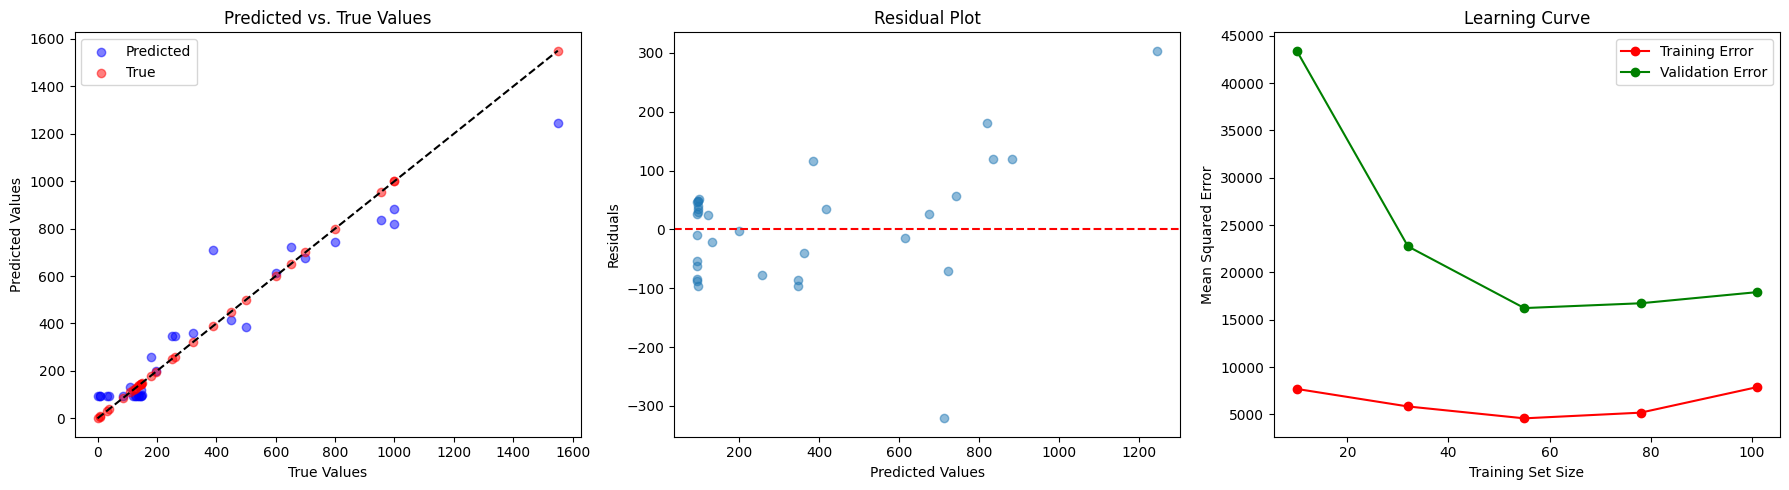

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the model
rf2 = RandomForestRegressor(n_estimators=100, max_depth=2, min_samples_split=5, random_state=42)
rf2.fit(X_train, y_train)
#test
rf2.score(X_test,y_test)

# Make predictions on test data
y_pred = rf2.predict(X_test)

# Calculate the bias
bias = np.mean(y_pred - y_test)

# Calculate the variance
variance = np.var(y_pred)

print("Bias: ", bias)
print("Variance: ", variance)
print('Score:', rf2.score(X_test, y_test))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual vs. Predicted
axes[0].scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')
axes[0].scatter(y_test, y_test, alpha=0.5, color='red', label='True')
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Predicted vs. True Values')
axes[0].legend()

# Plot 2: Residual Plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].axhline(y=0, color='r', linestyle='--')

# Plot 3: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
axes[2].plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Error')
axes[2].plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Error')
axes[2].set_xlabel('Training Set Size')
axes[2].set_ylabel('Mean Squared Error')
axes[2].set_title('Learning Curve')
axes[2].legend()

plt.tight_layout()
plt.show()



**Interpretation of the values**

- **Bias**: The bias is approximately -5.81. A negative bias tends to suggest that, the model tends to slightly underestimate the true values. However, the magnitude of the bias is relatively small, indicating that the model is being more able to detect some patterns in  the data but can still be improved.

- **Variance**: The variance is 99508.71, which is relatively high. This indicates that the model's predictions have a large variability, suggesting that the model is sensitive to changes in the training data. 

- **Score**: The score is 0.9189, indicating that approximately 91.89% of the variance in the target variable can be explained by the model. A higher score suggests a better fit, indicating that the model is able to explain a significant portion of the variability in the data. 

**Interpretation of the plots**


From the generated plos, it is evident that:
The training error and validation error exhibit more favorable characteristics. Specifically, the validation error shows a decreasing trend, while the training error, although it eventually increases, remains significantly smaller compared to the initial model configuration. This indicates a noteworthy improvement with the enlarged training set.

Furthermore, it is worth noting that the disparity between the actual and predicted values is reduced.


**Conclusion**

The configuration with an increased number of estimators (100) and a shallow max depth (2) has led to a model with limited capacity to capture the underlying patterns in the data effectively. The low number of estimators implies that the random forest model may not have enough trees to learn complex relationships in the data. Additionally, the shallow max depth of 1 limits the complexity of each decision tree, resulting in oversimplified models.

As a result, the model exhibits a relatively high bias, indicating that it is underfitting the data and failing to capture important patterns leading to poor generalization to unseen data.

### Configuration 03 :

Bias:  1.1712312499999982
Variance:  118256.01429490809
Score: 0.9800365652794875


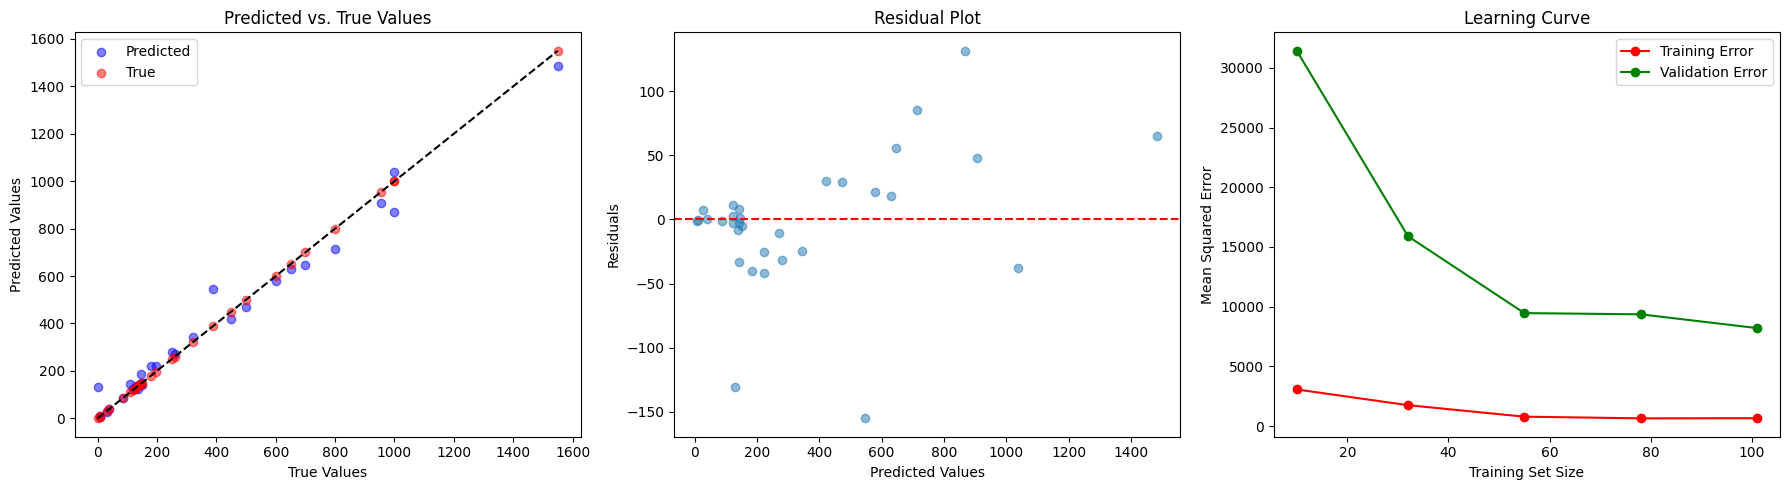

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the model
rf3 = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)
rf3.fit(X_train, y_train)
#test
rf3.score(X_test,y_test)
# Make predictions on test data

# Make predictions on test data
y_pred = rf3.predict(X_test)

# Calculate the bias
bias = np.mean(y_pred - y_test)

# Calculate the variance
variance = np.var(y_pred)

print("Bias: ", bias)
print("Variance: ", variance)
print('Score:', rf3.score(X_test, y_test))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual vs. Predicted
axes[0].scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')
axes[0].scatter(y_test, y_test, alpha=0.5, color='red', label='True')
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Predicted vs. True Values')
axes[0].legend()

# Plot 2: Residual Plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].axhline(y=0, color='r', linestyle='--')

# Plot 3: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf3, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
axes[2].plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Error')
axes[2].plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Error')
axes[2].set_xlabel('Training Set Size')
axes[2].set_ylabel('Mean Squared Error')
axes[2].set_title('Learning Curve')
axes[2].legend()

plt.tight_layout()
plt.show()


**Interpretation of the values**

Let's analyze the performance of the last model configuration:

- **Bias**: The bias is approximately 1.17. It is a small value. This shows that the model captures the underlying patterns well and makes predictions close to the true values.

- **Variance**: The variance is 118256.01, which is still  high.

- **Score**: The score is 0.9800, indicating that approximately 98.00% of the variance in the target variable can be explained by the model.  It is a great score performance and we can see that the model has improved a lot

**Interpretation of the plots**


The learning curves of the generated plots demonstrate notable improvements compared to the precdent model configuration. The validation error shows a decreasing trend, indicating that the model generalizes better and performs well on unseen data. Additionally, the training error decreases, approaching the zero. This suggests that the model is learning more effectively and capturing the underlying patterns in the data in a better way.

Moreover, the reduction in the disparity between the actual and predicted values is an encouraging sign. The closer alignment between the predicted and actual values indicates improved accuracy and precision in the model's predictions.


**Conclusions**


Overall, these observations indicate that the model's performance has been enhanced with the adjustments made to the model configuration. The learning curves and the reduced discrepancy between predicted and actual values reflect the model's improved ability to learn from the data and make more accurate predictions.

# Neural Network

When defining model complexity factors, We first need to determine the specific aspects of the model that we will vary and investigate their influence on underfitting.

 In the context of machine learning models, there are several key complexity factors to consider. We will study the following factors:

- **Hidden layers** : In the case of neural networks, the number of hidden layers is an essential complexity factor. Hidden layers enable the model to learn hierarchical representations and capture complex relationships between features.

- **Neurons in each layer** : The number of neurons within each hidden layer also contributes to model complexity. A higher number of neurons provides more capacity for the model to learn and represent complex patterns.

**Scaling the features**

In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)


### Baseline Model 

The baseline model serves as a starting point and reference for evaluating the performance of more complex models. It represents a simple and conservative approach to modeling, providing a baseline level of performance against which the effects of increasing model complexity can be measured.

The following model's specifications represent a simple feedforward neural network with one hidden layer and 10 neurons

2/2 [==============================] - 0s 3ms/step
Bias:  -0.10211953482699553
Variance:  0.03141362


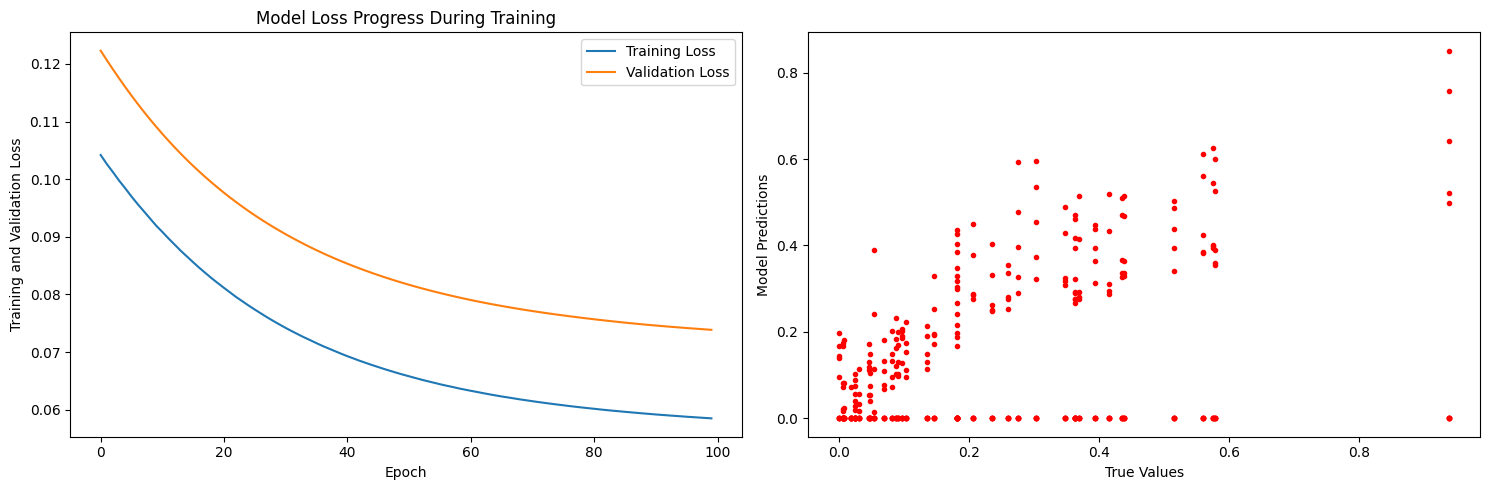

In [150]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim = 6, activation = 'relu'))
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2, verbose=0)
# Step 6: Evaluate the model

y_pred = model.predict(X_test)
# Calculate the bias
bias = np.mean(y_pred - y_test)
# Calculate the variance
variance = np.var(y_pred)

print("Bias: ", bias)
print("Variance: ", variance)
epochs_hist.history.keys()
# Plot the loss progression during training
plt.figure(figsize=(15, 5))

# Plot the loss progression during training
plt.subplot(1, 2, 1)
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

# Scatter plot of model predictions versus true values
plt.subplot(1, 2, 2)
plt.plot(y_test, y_pred, ".", color = 'r')
plt.xlabel('True Values')
plt.ylabel('Model Predictions')

plt.tight_layout()
plt.show()




### Complexifying the model

Here are the specifications for the more complex configuration in terms of the number of hidden layers and neurons:

- Hidden Layers: 4
- Neurons in each hidden layer: [100, 100, 100, 1] 

2/2 [==============================] - 0s 4ms/step
Bias:  0.007853521885192305
Variance:  0.04511305


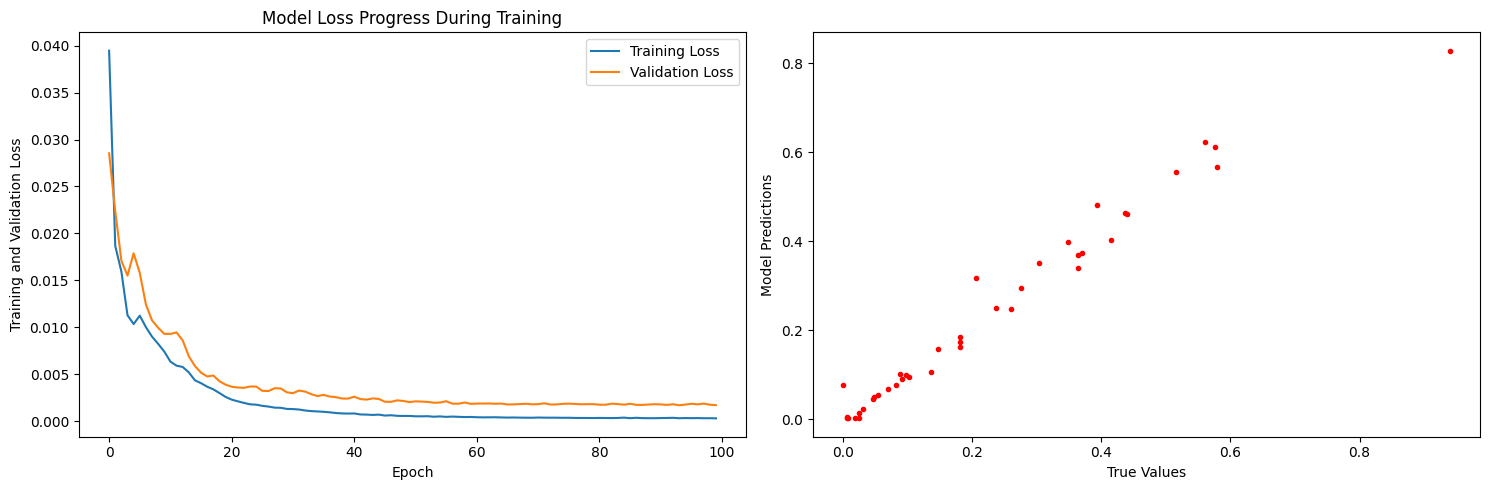

In [151]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 6, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))
# Step 6: Evaluate the model

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2, verbose=0)
# Step 6: Evaluate the model

y_pred = model.predict(X_test)
# Calculate the bias
bias = np.mean(y_pred - y_test)
# Calculate the variance
variance = np.var(y_pred)

print("Bias: ", bias)
print("Variance: ", variance)
epochs_hist.history.keys()
# Plot the loss progression during training
plt.figure(figsize=(15, 5))

# Plot the loss progression during training
plt.subplot(1, 2, 1)
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

# Scatter plot of model predictions versus true values
plt.subplot(1, 2, 2)
plt.plot(y_test, y_pred, ".", color = 'r')
plt.xlabel('True Values')
plt.ylabel('Model Predictions')

plt.tight_layout()
plt.show()

**Observations**

After testing our two configurations, the first one was very simple and basic, with only one hidden layer of 10 neurons. The second configuration was more complex, consisting of four hidden layers with 100, 100, 100, and 1 neurons, respectively. We observe that the training and validation loss curves are much steeper in the second configuration, suggesting that the model performed better. This improved performance is also evident in the scatter plot depicting the distribution of predicted values. In the first configuration, the plot appears somewhat randomized, while in the second configuration, it exhibits a more linearly homogeneous pattern.